In [23]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import cv2

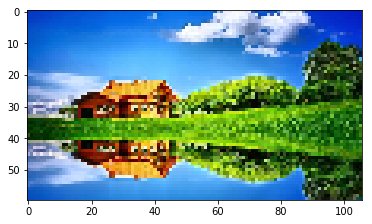

In [24]:
im=cv2.imread('./image.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# To reshape
r,c=im.shape[:2]
orr=60
oc=int(orr*float(c)/r)
im=cv2.resize(im,(oc,orr))
pixels = im.reshape((-1, 3))
plt.imshow(im)

In [25]:
# Applying KMeans from scikit learn
km = KMeans(n_clusters=8)
km.fit(pixels)
km.cluster_centers_

array([[  19.35187166,   45.09625668,    8.71657754],
       [  87.63933181,  164.27562642,  235.83447229],
       [ 213.92713568,  198.64572864,   64.27889447],
       [ 196.41554559,  217.14200299,  241.03736921],
       [ 123.698941  ,  185.20272315,   30.02571861],
       [  23.95563636,  102.37018182,  211.74545455],
       [ 136.82157676,   46.19502075,   10.70124481],
       [  59.67931937,  119.16492147,   21.13743455]])

In [26]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')
colors

array([[ 19,  45,   8],
       [ 87, 164, 235],
       [213, 198,  64],
       [196, 217, 241],
       [123, 185,  30],
       [ 23, 102, 211],
       [136,  46,  10],
       [ 59, 119,  21]], dtype=uint8)

In [27]:
# To calculate % of each dominant color
per = np.asarray(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
per = per / pixels.shape[0]
per

array([ 0.14701258,  0.20707548,  0.06257862,  0.10518868,  0.10393082,
        0.21619497,  0.03789308,  0.12012579], dtype=float32)

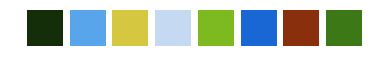

In [28]:
# To visualize dominant colors
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis("off")
    plt.imshow(patch)

In [29]:
dom = [[per[ix], colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)

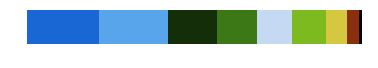

In [30]:
# To visualize according to their respective %
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()

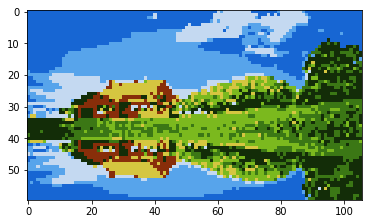

In [31]:
# To reproduce

for ix in range(len(pixels)):
    pixels[ix]=colors[km.labels_[ix]]
xn=pixels.reshape((orr,oc,3)) 
plt.imshow(xn)